<a href="https://colab.research.google.com/github/Info-stats-ai/Info-stats-ai/blob/main/Movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! unzip /content/netflix_movie_reccomendation.zip

Archive:  /content/netflix_movie_reccomendation.zip
  inflating: README                  
  inflating: combined_data_1.txt     
  inflating: combined_data_2.txt     
  inflating: combined_data_3.txt     
  inflating: combined_data_4.txt     
  inflating: movie_titles.csv        
  inflating: probe.txt               
  inflating: qualifying.txt          


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

In [ ]:
start = datetime.now()
if not os.path.isfile('/content/data.csv'):
#create a new csv file
#read all the file in netflix and store them in one data file
# We are reading from each of the 4 -5 files and appendin each rating
  data = open('data.csv', mode='w')
  row = list()
  files = ['combined_data_1.txt','combined_data_2.txt',
           'combined_data_3.txt','combined_data_4.txt']
for file in files:
  print("Reading ratings from {}...".format(file))
  with open(file) as f:
    for line in f:

      line = line.strip()
      if line.endswith(':'):
        #All below are ratings for this movie, until another movie appears
        movie_id = line.replace(':', '')
      else:
        row = [x for x in line.split(',')] # row is in list form
        # so basically I am making serties of list of same movie id
        # and then appending them by join and getting return a string rathert
        #then a list for csv file
        row.insert(0, movie_id)
        data.write(','.join(row))
        data.write('\n')
  print("Done.\n")
data.close()
print("Time taken:", datetime.now() - start)

Reading ratings from combined_data_1.txt...
Done.

Reading ratings from combined_data_2.txt...
Done.

Reading ratings from combined_data_3.txt...
Done.

Reading ratings from combined_data_4.txt...
Done.

Time taken: 0:01:28.742068




---


#### **1. Iterating Over Files**
```python
for file in files:
  print("Reading ratings from {}...".format(file))
```
- `files` is a list containing filenames.
- The loop iterates over each file, printing a message before reading it.

---

#### **2. Opening Each File**
```python
with open(file) as f:
```
- Opens the file (`file`) in **read mode** (`'r'` by default).
- The `with` statement ensures proper closing of the file after reading.

---

#### **3. Processing Each Line**
```python
for line in f:
```
- Iterates over each line in the file.

```python
line = line.strip()
```
- Removes **leading and trailing whitespace** (including newline characters).

---

#### **4. Identifying Movie IDs**
```python
if line.endswith(':'):
    # All below are ratings for this movie, until another movie appears
    movie_id = line.replace(':', '')
```
- If a line **ends with a colon (`:`)**, it represents a **movie ID**.
- `movie_id = line.replace(':', '')` removes the colon (`:`), storing only the movie ID.

✔️ **Why?**  
The dataset format might be something like:
```
1:
23,3,2005-09-06
54,5,2005-09-08
2:
12,4,2005-09-07
```
Here:
- `1:` is the **movie ID**.
- The following rows represent **user ratings for that movie**.
- `2:` indicates ratings for another movie.

---

#### **5. Processing Rating Lines**
```python
else:
    row = [x for x in line.split(',')]
```
- If the line **does not** end with `:`, it represents **user ratings**.
- `line.split(',')` splits the line into a list (e.g., `['23', '3', '2005-09-06']`).

```python
row.insert(0, movie_id)
```
- **Inserts the movie ID** at the start of `row`, making it:
  ```
  ['1', '23', '3', '2005-09-06']
  ```
  for the first rating.

```python
data.write(','.join(row))
data.write('\n')
```
- Joins the modified row **back into a comma-separated string**.
- Writes it into the output file (`data`).

✔️ **Why?**  
This ensures that every rating entry includes its **movie ID**, making the data structured for further analysis.


12,4,2005-09-07
```


In [ ]:
df = pd.read_csv('data.csv', sep=',', names=['movie', 'user','rating','date'])

In [ ]:
df.date = pd.to_datetime(df.date)
print(df.head())

   movie     user  rating       date
0      1  1488844       3 2005-09-06
1      1   822109       5 2005-05-13
2      1   885013       4 2005-10-19
3      1    30878       4 2005-12-26
4      1   823519       3 2004-05-03


In [ ]:
df.sort_values(by='date',inplace=True)
# inplace = True , data is modified

In [ ]:
# splitting training and test data
# but I am not going to store all the train and test data in one file
# we have to store the in the disk so that memory is less used
# and also for off line purpose
# as it is time based data we cannot use train -test split

In [ ]:
if not os.path.isfile("train.csv"):
  df.iloc[0 : int(df.shape[0]*0.80)].to_csv("train.csv",index=False)

  if not os.path.isfile("test.csv"):
    df.iloc[int(df.shape[0]*0.80) :].to_csv("test.csv",index=False)

In [ ]:
train_df = pd.read_csv("train.csv", parse_dates=['date'])
test_df = pd.read_csv("test.csv")
#parse_dates used to specify columns that should be interpreted as dates and times.
# It helps by automatically converting the specified columns from strings
#(their default representation in a CSV) into pandas `datetime` objects.
# This is crucial for time-series analysis
#as it allows you to perform date and time based operations
#(sorting, filtering, calculating time differences) on those columns efficiently.
#Without `parse_dates`, the date column would be read as a string,
#making such operations impossible or requiring manual and inefficient string manipulation.

In [ ]:
### Now we will work on Data Visualization on Train Data:


### Distribution Of Ratings :

Text(0.5, 0, 'Rating')

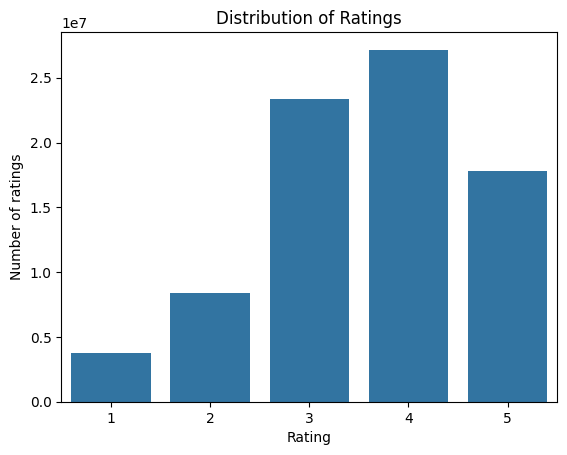

In [ ]:
fig , ax = plt.subplots()
plt.title("Distribution of Ratings")
sns.countplot(data=train_df,x='rating')
ax.set_ylabel("Number of ratings")
ax.set_xlabel("Rating")
#

In [ ]:
train_df["day_of_week"] = train_df.date.dt.day_name()
train_df.tail()

,movie,user,rating,date,day_of_week
80384400,12074,2033618,4,2005-08-08,Monday
80384401,862,1797061,3,2005-08-08,Monday
80384402,10986,1498715,5,2005-08-08,Monday
80384403,14861,500016,4,2005-08-08,Monday
80384404,5926,1044015,5,2005-08-08,Monday


<ipython-input-13-742199b1403d>:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax = train_df.resample('m', on = 'date')["rating"].count().plot()


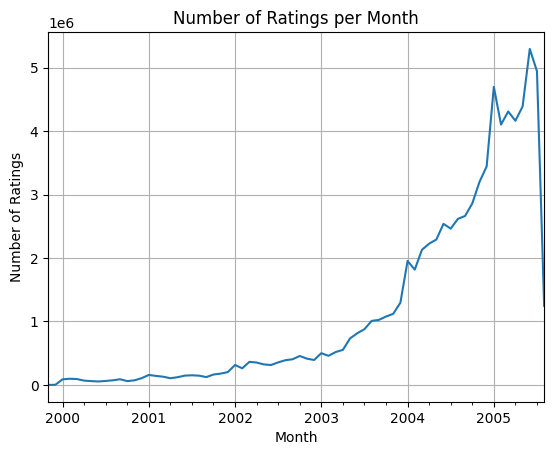

In [ ]:
# Number of Rating per month
ax = train_df.resample('m', on = 'date')["rating"].count().plot()
ax.set_title("Number of Ratings per Month")
ax.set_ylabel("Number of Ratings")
ax.set_xlabel("Month")
plt.grid()
plt.show()

### Analysis on the Rating given by user

In [ ]:
no_of_rated_movies_per_user = train_df.groupby(by='user')['rating'].count()
no_of_rated_movies_per_user.tail()

,rating
user,
2649404,13
2649409,40
2649421,24
2649426,254
2649429,236


In [ ]:
no_of_rated_movies_per_user.max()
# absurdly large buy someone

np.int64(17112)

<ipython-input-16-1ce339afed3b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_of_rated_movies_per_user, shade = True, cumulative =True, ax= ax1)
<ipython-input-16-1ce339afed3b>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_of_rated_movies_per_user, shade = True, cumulative =False, ax= ax2)


Text(0.5, 1.0, 'PDF')

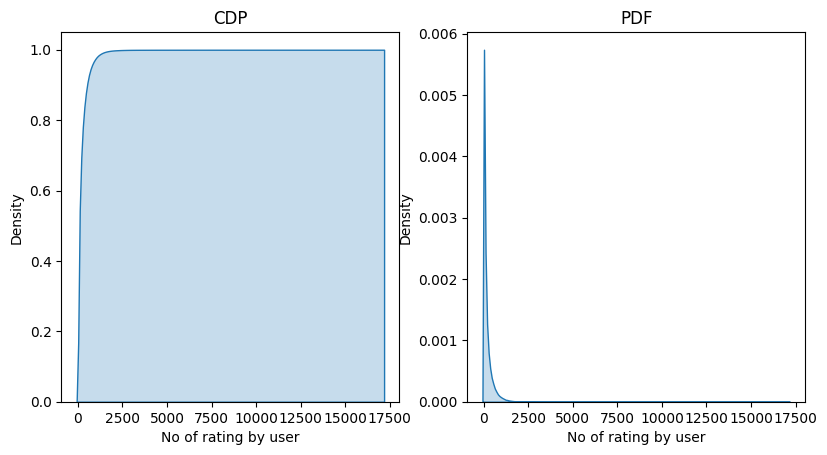

In [ ]:
fig = plt.figure(figsize=plt.figaspect(.5))
ax1 = fig.add_subplot(1,2,1)
sns.kdeplot(no_of_rated_movies_per_user, shade = True, cumulative =True, ax= ax1)
plt.xlabel("No of rating by user")
plt.title("CDP")
ax2 = fig.add_subplot(1,2,2)
sns.kdeplot(no_of_rated_movies_per_user, shade = True, cumulative =False, ax= ax2)
plt.xlabel("No of rating by user")
plt.title("PDF")

In [ ]:
no_of_rated_movies_per_user.describe()

,rating
count,405041.000000
mean,198.459921
std,290.793238
min,1.000000
25%,34.000000
50%,89.000000
75%,245.000000
max,17112.000000


In [ ]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0, 1.01, 0.01), )
quantiles

,rating
0.00,1.0
0.01,1.0
0.02,2.0
0.03,4.0
0.04,5.0
...,...
0.96,829.0
0.97,934.0
0.98,1079.0
0.99,1341.0


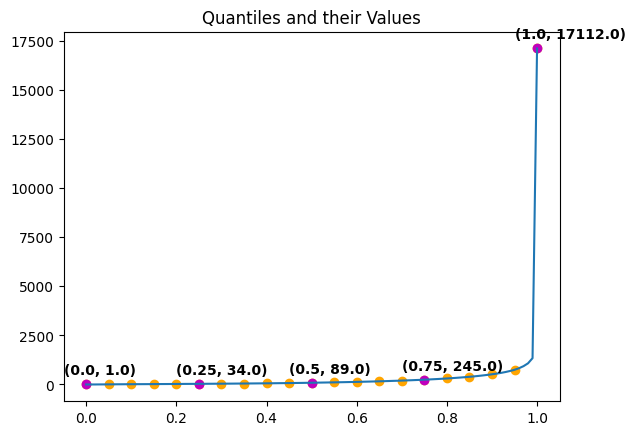

In [ ]:
plt.title("Quantiles and their Values")
quantiles.plot()
#quantiles with difference of 0.05
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c= "orange")
# quantiles with difference of 0.25
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c= "m")

# annotate 25th, 50th, 75th and 100th percentile values..
for x, y in zip(quantiles.index[::25], quantiles[::25]):
  plt.annotate(text= "({}, {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500), fontweight="bold")
plt.show()


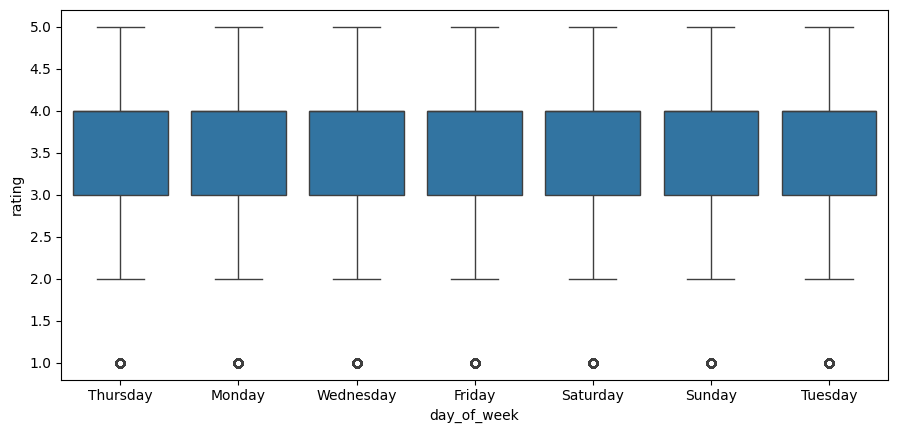

Time taken: 0:02:29.965191


In [ ]:
start = datetime.now()
fig = plt.figure(figsize=plt.figaspect(.45))
sns.boxplot(y='rating', x= 'day_of_week', data= train_df)
plt.show()
print("Time taken:", datetime.now() - start)

<ipython-input-21-dfc68fae68b9>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


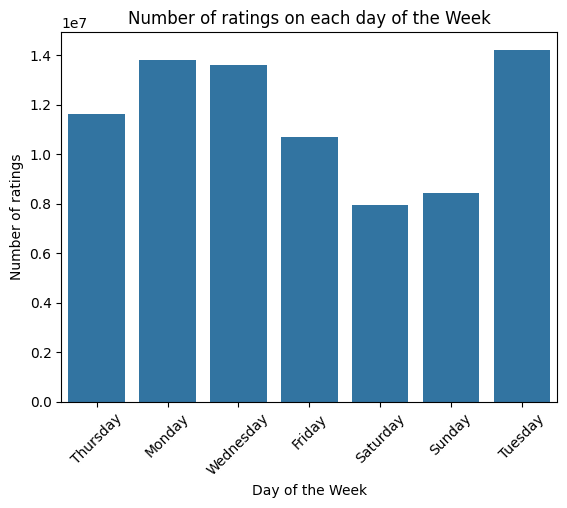

In [ ]:
# Number of ratings on each day of the Week
fig, ax = plt.subplots()
sns.countplot(x="day_of_week", data=train_df, ax = ax)
plt.title("Number of ratings on each day of the Week")
plt.ylabel("Number of ratings")
plt.xlabel("Day of the Week")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


# Some important Points
- We can discard our date time column from our training data , becuase it was just needed it for the splitting the train and test data
- and each user did not rated every movie, the matirx we get for our each user is very sparse

### Creating sparse matrix form data source
sparsity is 99% means 99 % dentries has null values
- we should use scipy

In [ ]:
start = datetime.now()
from scipy.sparse import csr_matrix

In [ ]:
sparse_df['user'] = sparse_df['user'].astype('category')
sparse_df['movie'] = sparse_df['movie'].astype('category')

In [ ]:
row = sparse_df['user'].cat.codes
col = sparse_df['movie'].cat.codes
data = sparse_df['rating']


In [ ]:
sparse_matrix = csr_matrix((data, (row, col)))

### Calculating sparsity of Train data

In [ ]:
sparse_matrix.shape


(405041, 17424)

In [ ]:
sparse_matrix.count_nonzero()


80384405

In [ ]:
#Calculating sparsity of Train data
sparsity = 1 - (sparse_matrix.count_nonzero() / (sparse_matrix.shape[0] * sparse_matrix.shape[1]))

print("Sparsity of training matrix: {:.2%}".format(sparsity))


Sparsity of training matrix: 98.86%


In [ ]:
# Create a new DataFrame with only the columns needed for creating the sparse matrix
sparse_test_df = test_df[['user', 'movie', 'rating']].copy()

# Ensure 'user' and 'movie' are categorical for proper indexing
sparse_test_df['user'] = sparse_test_df['user'].astype('category')
sparse_test_df['movie'] = sparse_test_df['movie'].astype('category')

# Create row, column, and data lists for the sparse matrix
row = sparse_test_df['user'].cat.codes
col = sparse_test_df['movie'].cat.codes
data = sparse_test_df['rating']

# Create the sparse matrix
test_sparse_matrix = csr_matrix((data, (row, col)))




In [ ]:
# test sparsity of the matrix
test_sparsity = 1 - (test_sparse_matrix.count_nonzero() / (test_sparse_matrix.shape[0] * test_sparse_matrix.shape[1]))
print("Sparsity of test matrix: {:.2%}".format(test_sparsity))

Sparsity of test matrix: 99.68%


In [ ]:
sparsity = 1 - (test_sparse_matrix.count_nonzero() / (test_sparse_matrix.shape[0] * test_sparse_matrix.shape[1]))
print("Sparsity of test matrix: {:.2%}".format(sparsity))


Sparsity of test matrix: 99.68%


#### Finding Global Average of all Movie ratings, Average rating per user  and Average rating per movie
- To understand what is the  nature of user , ie is he rating high or low in general.
- Of course getting an Movie average rating also important

In [ ]:
# Global average rating
global_average_rating = train_df['rating'].mean()
print(f"Global average rating: {global_average_rating:.2f}")

# Average rating by user
average_rating_by_user = train_df.groupby('user')['rating'].mean()
print("Average rating by user:\n", average_rating_by_user.head())

# Average rating for every movie
average_rating_by_movie = train_df.groupby('movie')['rating'].mean()
print("Average rating for every movie:\n", average_rating_by_movie.head())


Global average rating: 3.58
Average rating by user:
 user
6     3.516055
7     3.992958
10    3.378109
25    3.500000
33    3.787879
Name: rating, dtype: float64
Average rating for every movie:
 movie
1    3.718987
2    3.692308
3    3.647418
4    2.763359
5    4.036817
Name: rating, dtype: float64


<ipython-input-30-285a22cf6b76>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(average_rating_by_user, cumulative=True, shade=True, color='blue', ax=ax1)
<ipython-input-30-285a22cf6b76>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(average_rating_by_user, shade=True, color='blue', ax=ax2)


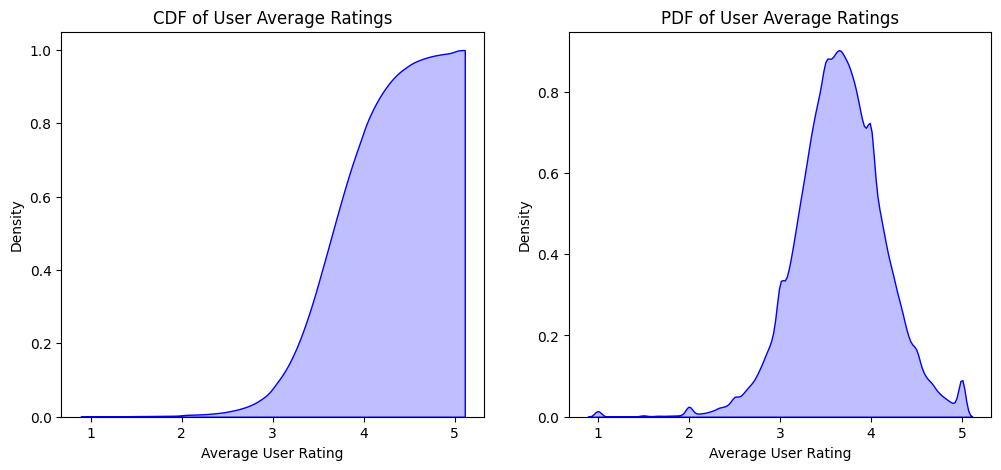

<ipython-input-30-285a22cf6b76>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(average_rating_by_movie, cumulative=True, shade=True, color='orange', ax=ax1)
<ipython-input-30-285a22cf6b76>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(average_rating_by_movie, shade=True, color='orange', ax=ax2)


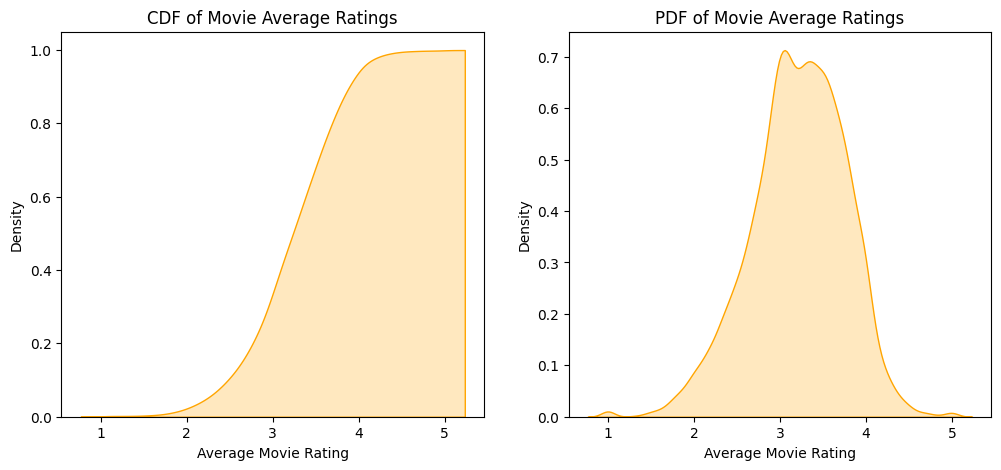

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot CDF and PDF for user average ratings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# CDF (Cumulative Distribution Function)
sns.kdeplot(average_rating_by_user, cumulative=True, shade=True, color='blue', ax=ax1)
ax1.set_title('CDF of User Average Ratings')
ax1.set_xlabel('Average User Rating')

# PDF (Probability Density Function)
sns.kdeplot(average_rating_by_user, shade=True, color='blue', ax=ax2)
ax2.set_title('PDF of User Average Ratings')
ax2.set_xlabel('Average User Rating')

plt.show()

# Plot CDF and PDF for movie average ratings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# CDF
sns.kdeplot(average_rating_by_movie, cumulative=True, shade=True, color='orange', ax=ax1)
ax1.set_title('CDF of Movie Average Ratings')
ax1.set_xlabel('Average Movie Rating')

# PDF
sns.kdeplot(average_rating_by_movie, shade=True, color='orange', ax=ax2)
ax2.set_title('PDF of Movie Average Ratings')
ax2.set_xlabel('Average Movie Rating')

plt.show()


### Cold Star Problem
- We do not have training data of some movies which are in test because we have splitted the data using the dates and we stored last 20 % data in our testing set.

In [ ]:


#  users in test data who are not present in train data
users_in_test_not_in_train = set(test_df['user'].unique()) - set(train_df['user'].unique())

#  number of users who did not appear in the train data
num_users_not_in_train = len(users_in_test_not_in_train)

# num of users who did not appear in the train data
total_users_in_test = test_df['user'].nunique()
percentage_users_not_in_train = (num_users_not_in_train / total_users_in_test) * 100

print("Number of users who did not appear in the train data:", num_users_not_in_train)
print("Percentage of users who did not appear in the train data: {:.2f}%".format(percentage_users_not_in_train))


Number of users who did not appear in the train data: 75148
Percentage of users who did not appear in the train data: 21.51%


In [ ]:

movies_in_test_not_in_train = set(test_df['movie'].unique()) - set(train_df['movie'].unique())

# Calculate the number of movies that did not appear in the train data
num_movies_not_in_train = len(movies_in_test_not_in_train)

# Calculate the percentage of movies that did not appear in the train data
total_movies_in_test = test_df['movie'].nunique()
percentage_movies_not_in_train = (num_movies_not_in_train / total_movies_in_test) * 100

print("Number of movies who did not appear in the train data:", num_movies_not_in_train)
print("Percentage of movies who did not appear in the train data: {:.2f}%".format(percentage_movies_not_in_train))



# Total number of movies
total_movies = len(pd.concat([train_df['movie'], test_df['movie']]).unique())
print("Total number of movies:", total_movies)

# Total number of movies in train data
total_train_movies = train_df['movie'].nunique()
print("Total number of train movies:", total_train_movies)

# Total number of movies in test data
total_test_movies = test_df['movie'].nunique()
print("Total number of test movies:", total_test_movies)


Number of movies who did not appear in the train data: 346
Percentage of movies who did not appear in the train data: 1.95%
Total number of movies: 17770
Total number of train movies: 17424
Total number of test movies: 17757


-  Trying to find similarity Matrix for user with that much data it is going to tricky:
- We have to decrease the no. of dimentions using Dimentional Reduction Techniques
- But PCA or dimentional reductional is even more tricky or more time consuming than then running the entire 405k*405k similarity matrix, because sparse matrix has so many zero values and our user matirx after PCA will be very dense and will take much more longer time

#### So, We need to come up with some another method , which is Run time computation:
- We will store user id and its corresponding user and similarty Matrix as a key value pair ( ie nested dictionary)
- So for each user id = we use it as a key
- and value will be (all other user id and similarity matrix value )
ie {k:(k,v)}


### Movie Movie Similarity:
- Each movie is 405 k dimentions, and user is 17k, so it will be large 405k*17k but it is extremely sparse
- S(i, j) = 17k *17k ( as movie similarity)
- If user similarity it would be 405k*405k
- So, total computation will 17k*17k/2
- which will be less

In [ ]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

#  pivot table to represent user-movie ratings
movie_user_matrix = train_df.pivot_table(index='movie', columns='user', values='rating').fillna(0)

# Convert the pivot table to a sparse matrix
sparse_movie_user_matrix = csr_matrix(movie_user_matrix.values)

# Calculate cosine similarity between movies
movie_similarity_matrix = cosine_similarity(sparse_movie_user_matrix)

# the similarity matrix to a DataFrame for easier handling
movie_similarity_df = pd.DataFrame(movie_similarity_matrix, index=movie_user_matrix.index, columns=movie_user_matrix.index)

print("Movie Similarity Matrix Created")



<ipython-input-33-b768dc827e12>:8: PerformanceWarning: The following operation may generate 7057434384 cells in the resulting pandas object.
  movie_user_matrix = train_df.pivot_table(index='movie', columns='user', values='rating').fillna(0)


Movie Similarity Matrix Created


### SurPRISE - Simple Python Recommendation System Engine

In [ ]:
#! pip install scikit-surprise

In [ ]:
start= datetime.now()


In [ ]:
# Sampling of the Data of train and test data
# strategy is like we will be training the small data
# set first run all the models
# and choose the best model
# we can apply that model on the entire dataset

In [ ]:

from scipy.sparse import csr_matrix, save_npz


def get_sample_sparse_matrix(sparse_matrix, no_users, no_movies, path):
    """
    Samples a sparse matrix to create a smaller version with a limited number of users and movies.
    Saves the sampled matrix to the specified path.

    Args:
        sparse_matrix (csr_matrix): The original sparse matrix to sample from.
        no_users (int): The desired number of users in the sample.
        no_movies (int): The desired number of movies in the sample.
        path (str): The path to save the sampled sparse matrix as an NPZ file.

    Returns:
        csr_matrix: The sampled sparse matrix.
    """
    # random user and movie indices for the sample
    row_ind = np.random.choice(sparse_matrix.shape[0], size=no_users, replace=False)
    col_ind = np.random.choice(sparse_matrix.shape[1], size=no_movies, replace=False)

    #  the sampled sparse matrix
    sample_sparse_matrix = sparse_matrix[row_ind, :][:, col_ind]

    # Save the sampled sparse matrix for future use
    save_npz(path, sample_sparse_matrix)

    return sample_sparse_matrix

start = datetime.now()
# Updated path to save in /content/
path = "/content/sample_train_sparse_matrix.npz"

if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    sample_train_sparse_matrix = sparse_matrix.load_npz(path)
    print("DONE..")
else:
    # get 10k users and 1k movies from available data
    sample_train_sparse_matrix = get_sample_sparse_matrix(sparse_matrix, no_users=10000, no_movies=1000, path=path)

print("Time taken:", datetime.now() - start)

Time taken: 0:00:00.091949


In [ ]:
start = datetime.now()
# Updated path to save in /content/
path = "/content/sample_test_sparse_matrix.npz"

if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    sample_test_sparse_matrix = sparse_matrix.load_npz(path)
    print("DONE..")
else:
    # get 10k users and 1k movies from available data
    sample_test_sparse_matrix = get_sample_sparse_matrix(test_sparse_matrix, no_users=10000, no_movies=1000, path=path)

print("Time taken:", datetime.now() - start)


Time taken: 0:00:00.036771


In [ ]:
# Global average rating
global_average_rating = train_df['rating'].mean()
print(f"Global average rating: {global_average_rating:.2f}")

# Average rating per user
average_rating_per_user = train_df.groupby('user')['rating'].mean()
print("Average rating per user:\n", average_rating_per_user.head())

# Average rating per movie
average_rating_per_movie = train_df.groupby('movie')['rating'].mean()
print("Average rating per movie:\n", average_rating_per_movie.head())


Global average rating: 3.58
Average rating per user:
 user
6     3.516055
7     3.992958
10    3.378109
25    3.500000
33    3.787879
Name: rating, dtype: float64
Average rating per movie:
 movie
1    3.718987
2    3.692308
3    3.647418
4    2.763359
5    4.036817
Name: rating, dtype: float64


### Converting the problem into regression problem :

### Creating my training features :

In [ ]:
from scipy.sparse import find
sample_train_users, sample_train_movies, sample_train_ratings = find(sample_train_sparse_matrix)

In [ ]:
#  average rating per user
average_rating_per_user = train_df.groupby('user')['rating'].mean()
#  average rating per movie
average_rating_per_movie = train_df.groupby('movie')['rating'].mean()
#  global average rating
global_average_rating = train_df['rating'].mean()

#  sample_train_averages dictionary
sample_train_averages = {
    'global': global_average_rating,
    'user': average_rating_per_user,
    'movie': average_rating_per_movie
}


#Creating my training features:
sample_train_users, sample_train_movies, sample_train_ratings = find(sample_train_sparse_matrix)

start = datetime.now()
if os.path.isfile('/content/reg_train.csv'):
    print("File already exists you don't have to prepare again...")
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
    with open('/content/reg_train.csv', mode='w') as reg_data_file:
        count = 0
        for (user, movie, rating) in zip(sample_train_users, sample_train_movies, sample_train_ratings):
            st = datetime.now()


            # Getting the original user and movie IDs from the train_df using the index of sampled data
            original_user_id = train_df['user'].iloc[sample_train_sparse_matrix.tocsr()[user].indices[0]]
            original_movie_id = train_df['movie'].iloc[sample_train_sparse_matrix.tocsr()[:,movie].indices[0]]

            # Ratings of "movie" by similar users of "user"
            user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:]
            top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            # Accessing movie average from sample_train_averages

            top_sim_users_ratings.extend([sample_train_averages['movie'][original_movie_id]] * (5 - len(top_sim_users_ratings)))


            # Ratings by "user" to similar movies of "movie"
            movie_sim = cosine_similarity(sample_train_sparse_matrix[:, movie].T, sample_train_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:]
            top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            # Accessing user average from sample_train_averages

            top_sim_movies_ratings.extend([sample_train_averages['user'][original_user_id]] * (5 - len(top_sim_movies_ratings)))


            # Preparing the row to be stored in a file
            row = [user, movie, sample_train_averages['global']]  # first feature
            row.extend(top_sim_users_ratings)  # next 5 features
            row.extend(top_sim_movies_ratings)  # next 5 features

            row.append(sample_train_averages['user'][original_user_id])  # Avg_user rating
            row.append(sample_train_averages['movie'][original_movie_id])  # Avg_movie rating
            row.append(rating)  # The actual Rating

            count += 1

            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')
            if (count) % 10000 == 0:
                print("Done for {} rows----- {}".format(count, datetime.now() - start))

print(datetime.now() - start)



preparing 109483 tuples for the dataset..

Done for 10000 rows----- 0:02:02.010761
Done for 20000 rows----- 0:04:03.586466
Done for 30000 rows----- 0:06:04.978613
Done for 40000 rows----- 0:08:06.276471
Done for 50000 rows----- 0:10:07.520079
Done for 60000 rows----- 0:12:08.441816
Done for 70000 rows----- 0:14:09.381941
Done for 80000 rows----- 0:16:10.831306
Done for 90000 rows----- 0:18:11.882501
Done for 100000 rows----- 0:20:12.873176
0:22:07.200392


In [ ]:
start = datetime.now()
if os.path.isfile('/content/reg_test.csv'):
    print("File already exists you don't have to prepare again...")
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_test_sparse_matrix.data)))
    with open('/content/reg_test.csv', mode='w') as reg_data_file:
        count = 0
        sample_test_users, sample_test_movies, sample_test_ratings = find(sample_test_sparse_matrix)
        for (user, movie, rating) in zip(sample_test_users, sample_test_movies, sample_test_ratings):
            st = datetime.now()

            try:
              original_user_id = test_df['user'].iloc[sample_test_sparse_matrix.tocsr()[user].indices[0]]
              original_movie_id = test_df['movie'].iloc[sample_test_sparse_matrix.tocsr()[:,movie].indices[0]]
            except:
              continue

            # Ratings of "movie" by similar users of "user"
            user_sim = cosine_similarity(sample_test_sparse_matrix[user], sample_test_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:]
            top_ratings = sample_test_sparse_matrix[top_sim_users, movie].toarray().ravel()
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            # Accessing movie average from sample_train_averages

            try:
              top_sim_users_ratings.extend([sample_train_averages['movie'][original_movie_id]] * (5 - len(top_sim_users_ratings)))
            except:
              top_sim_users_ratings.extend([sample_train_averages['global']] * (5 - len(top_sim_users_ratings)))


            # Ratings by "user" to similar movies of "movie"
            movie_sim = cosine_similarity(sample_test_sparse_matrix[:, movie].T, sample_test_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:]
            top_ratings = sample_test_sparse_matrix[user, top_sim_movies].toarray().ravel()
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            # Accessing user average from sample_train_averages

            try:
              top_sim_movies_ratings.extend([sample_train_averages['user'][original_user_id]] * (5 - len(top_sim_movies_ratings)))
            except:
              top_sim_movies_ratings.extend([sample_train_averages['global']] * (5 - len(top_sim_movies_ratings)))


            # Prepare the row to be stored in a file
            row = [user, movie, sample_train_averages['global']]  # first feature
            row.extend(top_sim_users_ratings)  # next 5 features
            row.extend(top_sim_movies_ratings)  # next 5 features
            # --- Changes here ---
            try:
              row.append(sample_train_averages['user'][original_user_id])  # Avg_user rating
            except:
              row.append(sample_train_averages['global'])
            try:
              row.append(sample_train_averages['movie'][original_movie_id])  # Avg_movie rating
            except:
              row.append(sample_train_averages['global'])

            row.append(rating)  # The actual Rating

            count += 1

            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')
            if (count) % 10000 == 0:
                print("Done for {} rows----- {}".format(count, datetime.now() - start))

print(datetime.now() - start)


preparing 33201 tuples for the dataset..

Done for 10000 rows----- 0:01:04.141108
Done for 20000 rows----- 0:02:08.330927
Done for 30000 rows----- 0:03:12.172255
0:03:32.587498


### transforming data for Surprise models
- We dont give raw data to train the model in surprise library.
- They have a saperate format for train and test data, which will be useful for training the models like SVD, KNN BaseLineOnly...etc..., in surprise
- We can form the trainset from a file or from a pandas DataFrame.

In [ ]:
# Step 1: Force reinstallation of both packages
!pip uninstall -y numpy scikit-surprise
!pip install numpy --upgrade
!pip install scikit-surprise --no-cache-dir --force-reinstall



Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
Found existing installation: scikit-surprise 1.1.4
Uninstalling scikit-surprise-1.1.4:
  Successfully uninstalled scikit-surprise-1.1.4
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 273.5 MB/s eta 0:00:00

In [ ]:
import importlib
import sys

# Step 2: Manually reload numpy and surprise (bypass cached version)
importlib.reload(sys.modules['numpy'])
sys.modules.pop('surprise', None)  # Remove surprise if it's in memory

# Step 3: Try importing again
from surprise import Reader, Dataset
reader = Reader(rating_scale=(1,5))


ImportError: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

In [ ]:
from surprise import Reader, Dataset
reader = Reader(rating_scale=(1,5))



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

In [ ]:
reg_train = pd.read_csv('/content/reg_train.csv', names=['user', 'movie', 'global_avg', 'sim_user1', 'sim_user2', 'sim_user3', 'sim_user4', 'sim_user5', 'sim_movie1', 'sim_movie2', 'sim_movie3', 'sim_movie4', 'sim_movie5', 'user_avg', 'movie_avg', 'rating'])


In [ ]:
reader = Reader(rating_scale=(1,5))
# to tell how to read the file


NameError: name 'Reader' is not defined

In [ ]:
# create the traindata from the dataframe
train_data = Dataset.load_from_df(reg_train[['user', "movie",'rating' ]],reader)

In [ ]:
trainset = train_data.build_full_trainset()

In [ ]:
type(trainset)

In [ ]:
reg_test =  pd.read_csv('/content/reg_test.csv',names=['user', 'movie', 'global_avg', 'sim_user1', 'sim_user2', 'sim_user3', 'sim_user4', 'sim_user5', 'sim_movie1', 'sim_movie2', 'sim_movie3', 'sim_movie4', 'sim_movie5', 'user_avg', 'movie_avg', 'rating'])

In [ ]:
testset = list(zip(reg_test['user'], reg_test['movie'], reg_test['rating']))

In [ ]:
type(testset)

In [ ]:
testset[-1]

In [ ]:
# Applying Machine Learning Models

In [ ]:
model_evaluation_train = dict()
model_evaluation_test = dict()
model_evaluation_test, model_evaluation_train

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

def calculate_rmse_mape(actual_ratings, predicted_ratings):
  rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
  mape = mean_absolute_percentage_error(actual_ratings, predicted_ratings)
  return rmse, mape




In [ ]:
#pip install xgboost

In [ ]:
# prompt: create a run_xgboost function also store the results in train_results  and test_result dictionary and also store some feature importnce

import xgboost as xgb

def run_xgboost(train_df, test_df):
  """Runs XGBoost regression and stores results in dictionaries."""

  train_results = {}
  test_results = {}
  feature_importance = {}

  X_train = train_df.drop('rating', axis=1)
  y_train = train_df['rating']
  X_test = test_df.drop('rating', axis=1)
  y_test = test_df['rating']

  model = xgb.XGBRegressor(objective ='reg:squarederror',
                           colsample_bytree = 0.3, learning_rate = 0.1,
                           max_depth = 5, alpha = 10, n_estimators = 10)
  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_rmse, train_mape = calculate_rmse_mape(y_train, y_train_pred)
  test_rmse, test_mape = calculate_rmse_mape(y_test, y_test_pred)

  train_results['rmse'] = train_rmse
  train_results['mape'] = train_mape
  test_results['rmse'] = test_rmse
  test_results['mape'] = test_mape

  feature_importance['feature_importance'] = model.feature_importances_


  return train_results, test_results, feature_importance


In [ ]:
# prompt: run xg boost regressor on and also include execution time on reg_train and Reg_test data anlso get important features


import time

start_time = time.time()

train_results, test_results, feature_importance = run_xgboost(reg_train, reg_test)

end_time = time.time()
execution_time = end_time - start_time

print("XGBoost Regression Results:")
print("Train RMSE:", train_results['rmse'])
print("Train MAPE:", train_results['mape'])
print("Test RMSE:", test_results['rmse'])
print("Test MAPE:", test_results['mape'])
print("Execution Time:", execution_time)


# Print the most important features
feature_importance_df = pd.DataFrame({'Feature': reg_train.drop('rating', axis=1).columns, 'Importance': feature_importance['feature_importance']})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nMost Important Features:")
feature_importance_df


### Baseline Suprise model:
- solving optimization problem
- Baselin surprise is similar to user avg., movie avg.
- Where as knn surprise model is similar to similarty between users and movies
It is a linear model
- u: user
- r : rating
- i : item
- r_ui_predicted = b_ui = mean + b_u + b_i
- ### Where :
- mean is average of all rating
 in training data
- b_u : user bias
- b_i : item bias(movie biases)
- b_ui = bias of. user u and item i or movie i
- r_ui_predicted is th predicted rating of user u and movie i.
- ### We call r_ui as baseline model( b_ui)
- These biases will be estimated using one optimization problem:
- min[b_u, b_i]summation( (r_ui - r_ui_predicted))**2 + regularization*constant , mean will be calculated
- Can be solved by using SGD - as linear model


In [ ]:
def calculate_surprise_rmse_mape(predictions):

  actual_ratings = [pred.r_ui for pred in predictions]
  predicted_ratings = [pred.est for pred in predictions]
  rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
  mape = mean_absolute_percentage_error(actual_ratings, predicted_ratings)
  return rmse, mape

In [ ]:
def get_surprise_ratings(predictions):
  actual_ratings = [pred.r_ui for pred in predictions]
  predicted_ratings = [pred.est for pred in predictions]
  return actual_ratings, predicted_ratings


In [ ]:
from surprise import BaselineOnly

In [ ]:
def run_surprise(algo, trainset, testset):
    """Trains and evaluates a Surprise algorithm, returning train and test RMSE and MAPE."""

    start_time = datetime.now()

    # Train the algorithm on the trainset
    algo.fit(trainset)

    # Make predictions on the trainset
    train_predictions = algo.test(trainset.build_testset())  # Get predictions for trainset
    train_rmse, train_mape = calculate_surprise_rmse_mape(train_predictions)

    # Make predictions on the testset
    test_predictions = algo.test(testset)
    test_rmse, test_mape = calculate_surprise_rmse_mape(test_predictions)

    end_time = datetime.now()
    execution_time = (end_time - start_time).total_seconds()  # Calculate execution time

    print("Algorithm:", type(bsl_algo).__name__)
    print("Train RMSE:", train_rmse)
    print("Train MAPE:", train_mape)
    print("Test RMSE:", test_rmse)
    print("Test MAPE:", test_mape)
    print("Execution time: {} seconds".format(execution_time))

    # Store results in separate dictionaries
    train_results = {'rmse': train_rmse, 'mape': train_mape, 'execution_time': execution_time}
    test_results = {'rmse': test_rmse, 'mape': test_mape, 'execution_time': execution_time}

    return train_results, test_results

In [ ]:
bsl_options = {"method": "sgd", "learning_rate": .001}

bsl_algo = BaselineOnly(bsl_options=bsl_options)
bsl_train_results, bsl_test_results = run_surprise(bsl_algo, trainset, testset)

model_evaluation_train['bsl_algo']= bsl_train_results
model_evaluation_test['bsl_algo']= bsl_test_results

In [ ]:
from surprise import KNNBaseline

In [ ]:
sim_option ={ "user_based": True,
              "name": "pearson_baseline",
              "shrinkage": 100,
              "min_support" : 2
              }
# We keep other parameters like regualrization parameter and learning rate
bsl_options = {"method": 'sgd'}
knn_bsl_u = KNNBaseline(k=40, sim_options=sim_option, bsl_options=bsl_options)
knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset)

model_evaluation_train['knn_bsl_u']= knn_bsl_u_train_results
model_evaluation_test['knn_bsl_u']= knn_bsl_u_test_results

In [ ]:
sim_option ={ "user_based": False,
              "name": "pearson_baseline",
              "shrinkage": 100,
              "min_support" : 2
              }
# We keep other parameters like regualrization parameter and learning rate
bsl_options = {"method": 'sgd'}
knn_bsl_m = KNNBaseline(k=40, sim_options=sim_option, bsl_options=bsl_options)
knn_bsl_m_train_results, knn_bsl_m_test_results = run_surprise(knn_bsl_m, trainset, testset)

model_evaluation_train['knn_bsl_m']= knn_bsl_m_train_results
model_evaluation_test['knn_bsl_m']= knn_bsl_m_test_results

Now Xg boost using Surprise Baseline predictor + KNN Baseline predictor

In [ ]:
# prompt: now add base line model output , knn item item output and knn user user item output as a features for train and test set for my xgboost algo

import pandas as pd
# ... (Your existing code) ...

reg_train = pd.read_csv('/content/reg_train.csv', names=['user', 'movie', 'global_avg', 'sim_user1', 'sim_user2', 'sim_user3', 'sim_user4', 'sim_user5', 'sim_movie1', 'sim_movie2', 'sim_movie3', 'sim_movie4', 'sim_movie5', 'user_avg', 'movie_avg', 'rating'])

# Predict ratings using BaselineOnly model
bsl_predictions_train = bsl_algo.test(trainset.build_testset())
bsl_predictions_train_df = pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in bsl_predictions_train], columns=['user', 'movie', 'bsl_pred'])

# Predict ratings using KNN user-user model
knn_bsl_u_predictions_train = knn_bsl_u.test(trainset.build_testset())
knn_bsl_u_predictions_train_df = pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in knn_bsl_u_predictions_train], columns=['user', 'movie', 'knn_u_pred'])

# Predict ratings using KNN item-item model
knn_bsl_m_predictions_train = knn_bsl_m.test(trainset.build_testset())
knn_bsl_m_predictions_train_df = pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in knn_bsl_m_predictions_train], columns=['user', 'movie', 'knn_m_pred'])

# Merge predicted ratings with the training dataset
reg_train = pd.merge(reg_train, bsl_predictions_train_df, on=['user', 'movie'], how='left')
reg_train = pd.merge(reg_train, knn_bsl_u_predictions_train_df, on=['user', 'movie'], how='left')
reg_train = pd.merge(reg_train, knn_bsl_m_predictions_train_df, on=['user', 'movie'], how='left')

# ... (Similar steps for the test data) ...
reg_test = pd.read_csv('/content/reg_test.csv', names=['user', 'movie', 'global_avg', 'sim_user1', 'sim_user2', 'sim_user3', 'sim_user4', 'sim_user5', 'sim_movie1', 'sim_movie2', 'sim_movie3', 'sim_movie4', 'sim_movie5', 'user_avg', 'movie_avg', 'rating'])

bsl_predictions_test = bsl_algo.test(testset)
bsl_predictions_test_df = pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in bsl_predictions_test], columns=['user', 'movie', 'bsl_pred'])

knn_bsl_u_predictions_test = knn_bsl_u.test(testset)
knn_bsl_u_predictions_test_df = pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in knn_bsl_u_predictions_test], columns=['user', 'movie', 'knn_u_pred'])

knn_bsl_m_predictions_test = knn_bsl_m.test(testset)
knn_bsl_m_predictions_test_df = pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in knn_bsl_m_predictions_test], columns=['user', 'movie', 'knn_m_pred'])

reg_test = pd.merge(reg_test, bsl_predictions_test_df, on=['user', 'movie'], how='left')
reg_test = pd.merge(reg_test, knn_bsl_u_predictions_test_df, on=['user', 'movie'], how='left')
reg_test = pd.merge(reg_test, knn_bsl_m_predictions_test_df, on=['user', 'movie'], how='left')




In [ ]:
start_time = time.time()

train_results, test_results, feature_importance = run_xgboost(reg_train, reg_test)

end_time = time.time()
execution_time = end_time - start_time

print("XGBoost Regression Results:")
print("Train RMSE:", train_results['rmse'])
print("Train MAPE:", train_results['mape'])
print("Test RMSE:", test_results['rmse'])
print("Test MAPE:", test_results['mape'])
print("Execution Time:", execution_time)


# Print the most important features
feature_importance_df = pd.DataFrame({'Feature': reg_train.drop('rating', axis=1).columns, 'Importance': feature_importance['feature_importance']})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nMost Important Features:")
feature_importance_df

### Matrix Factorization technique
- r_ui_predicted = mean + b_u + b_i + (q_i)^TP_u
- q_i : Representation of item(movie) in latent Factor space
- p_u - representation of user in new latent factor space.

In [ ]:
from surprise import SVD

# Create an SVD algorithm instance
svd = SVD(n_factors=100, biased=True, random_state=15, verbose= True)

# Train and evaluate the SVD algorithm
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset)

# Store the results
model_evaluation_train['svd_algo'] = svd_train_results
model_evaluation_test['svd_algo'] = svd_test_results



### SVD MATRIX Factorization with implicit feedback from user(user rated movies)

In [ ]:
from surprise import SVDpp

In [ ]:
# Create an SVDpp algorithm instance
svdpp = SVDpp(n_factors=100, random_state=15, verbose=True)

# Train and evaluate the SVDpp algorithm
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset, testset)

# Store the results
model_evaluation_train['svdpp_algo'] = svdpp_train_results
model_evaluation_test['svdpp_algo'] = svdpp_test_results


In [ ]:
reg_train = pd.read_csv('/content/reg_train.csv', names=['user', 'movie', 'global_avg', 'sim_user1', 'sim_user2', 'sim_user3', 'sim_user4', 'sim_user5', 'sim_movie1', 'sim_movie2', 'sim_movie3', 'sim_movie4', 'sim_movie5', 'user_avg', 'movie_avg', 'rating'])

# Predict ratings using SVD model
svd_predictions_train = svd.test(trainset.build_testset())
svd_predictions_train_df = pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in svd_predictions_train], columns=['user', 'movie', 'svd_pred'])

# Predict ratings using SVDpp model
svdpp_predictions_train = svdpp.test(trainset.build_testset())
svdpp_predictions_train_df = pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in svdpp_predictions_train], columns=['user', 'movie', 'svdpp_pred'])


# Merge predicted ratings with the training dataset
reg_train = pd.merge(reg_train, svd_predictions_train_df, on=['user', 'movie'], how='left')
reg_train = pd.merge(reg_train, svdpp_predictions_train_df, on=['user', 'movie'], how='left')



reg_test = pd.read_csv('/content/reg_test.csv', names=['user', 'movie', 'global_avg', 'sim_user1', 'sim_user2', 'sim_user3', 'sim_user4', 'sim_user5', 'sim_movie1', 'sim_movie2', 'sim_movie3', 'sim_movie4', 'sim_movie5', 'user_avg', 'movie_avg', 'rating'])

svd_predictions_test = svd.test(testset)
svd_predictions_test_df = pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in svd_predictions_test], columns=['user', 'movie', 'svd_pred'])

svdpp_predictions_test = svdpp.test(testset)
svdpp_predictions_test_df = pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in svdpp_predictions_test], columns=['user', 'movie', 'svdpp_pred'])


reg_test = pd.merge(reg_test, svd_predictions_test_df, on=['user', 'movie'], how='left')
reg_test = pd.merge(reg_test, svdpp_predictions_test_df, on=['user', 'movie'], how='left')

In [ ]:
start_time = time.time()

train_results, test_results, feature_importance = run_xgboost(reg_train, reg_test)

end_time = time.time()
execution_time = end_time - start_time

print("XGBoost Regression Results:")
print("Train RMSE:", train_results['rmse'])
print("Train MAPE:", train_results['mape'])
print("Test RMSE:", test_results['rmse'])
print("Test MAPE:", test_results['mape'])
print("Execution Time:", execution_time)


# Print the most important features
feature_importance_df = pd.DataFrame({'Feature': reg_train.drop('rating', axis=1).columns, 'Importance': feature_importance['feature_importance']})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nMost Important Features:")
feature_importance_df


In [ ]:
 # Now I would like to do hyperparmeter tuning on this model get the best features

import pandas as pd
from sklearn.model_selection import GridSearchCV

def run_xgboost_with_hyperparameter_tuning(train_df, test_df):
  """Runs XGBoost regression with hyperparameter tuning and feature selection."""

  train_results = {}
  test_results = {}
  feature_importance = {}

  X_train = train_df.drop('rating', axis=1)
  y_train = train_df['rating']
  X_test = test_df.drop('rating', axis=1)
  y_test = test_df['rating']

  param_grid = {
      'n_estimators': [50, 100, 150],
      'max_depth': [3, 5, 7],
      'learning_rate': [0.01, 0.1, 0.2],
      'colsample_bytree': [0.3, 0.5, 0.7],
      'alpha': [1, 5, 10]
  }

  model = xgb.XGBRegressor(objective='reg:squarederror')

  #  grid search with cross-validation
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
  grid_search.fit(X_train, y_train)

  # Get the best model and its parameters
  best_model = grid_search.best_estimator_
  best_params = grid_search.best_params_

  y_train_pred = best_model.predict(X_train)
  y_test_pred = best_model.predict(X_test)

  train_rmse, train_mape = calculate_rmse_mape(y_train, y_train_pred)
  test_rmse, test_mape = calculate_rmse_mape(y_test, y_test_pred)

  train_results['rmse'] = train_rmse
  train_results['mape'] = train_mape
  test_results['rmse'] = test_rmse
  test_results['mape'] = test_mape

  feature_importance['feature_importance'] = best_model.feature_importances_

  return train_results, test_results, feature_importance, best_params


start_time = time.time()

train_results, test_results, feature_importance, best_params = run_xgboost_with_hyperparameter_tuning(reg_train, reg_test)

end_time = time.time()
execution_time = end_time - start_time

print("XGBoost Regression Results (with Hyperparameter Tuning):")
print("Train RMSE:", train_results['rmse'])
print("Train MAPE:", train_results['mape'])
print("Test RMSE:", test_results['rmse'])
print("Test MAPE:", test_results['mape'])
print("Execution Time:", execution_time)
print("Best Hyperparameters:", best_params)

# Print the most important features
feature_importance_df = pd.DataFrame({'Feature': reg_train.drop('rating', axis=1).columns, 'Importance': feature_importance['feature_importance']})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nMost Important Features:")
feature_importance_df


In [ ]:
# prompt: get classification, recall, f1 socre etc.

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Assuming you have y_true (actual labels) and y_pred (predicted labels)
# Example:
# y_true = [1, 0, 1, 1, 0]
# y_pred = [1, 1, 1, 0, 0]

# Calculate classification metrics
print(classification_report(y_true, y_pred))

# You can also calculate individual metrics separately:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


In [ ]:
# prompt: Generate xg boost with k fold validation , and use early stopping , then again get accuacy , confusion matrix, recall etc , and perform hyperparameter tuning

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

def run_xgboost_with_kfold_and_early_stopping(train_df, test_df, n_splits=5, early_stopping_rounds=10):
  """Runs XGBoost regression with k-fold cross-validation and early stopping."""

  X_train = train_df.drop('rating', axis=1)
  y_train = train_df['rating']
  X_test = test_df.drop('rating', axis=1)
  y_test = test_df['rating']

  # Define the XGBoost model with initial parameters
  model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)  # Large number of estimators for early stopping

  # Create a KFold object
  kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

  # Initialize lists to store evaluation metrics
  train_rmses = []
  train_mapes = []
  test_rmses = []
  test_mapes = []

  # Perform k-fold cross-validation
  for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model with early stopping
    model.fit(X_train_fold, y_train_fold,
              eval_set=[(X_val_fold, y_val_fold)],
              early_stopping_rounds=early_stopping_rounds,
              verbose=False)

    # Make predictions on the train and validation sets
    y_train_pred_fold = model.predict(X_train_fold)
    y_val_pred_fold = model.predict(X_val_fold)

    # Calculate RMSE and MAPE for this fold
    train_rmse_fold, train_mape_fold = calculate_rmse_mape(y_train_fold, y_train_pred_fold)
    test_rmse_fold, test_mape_fold = calculate_rmse_mape(y_val_fold, y_val_pred_fold)

    train_rmses.append(train_rmse_fold)
    train_mapes.append(train_mape_fold)
    test_rmses.append(test_rmse_fold)
    test_mapes.append(test_mape_fold)


  # Make predictions on the test set
  y_test_pred = model.predict(X_test)

  # Calculate final RMSE and MAPE for the test set
  test_rmse, test_mape = calculate_rmse_mape(y_test, y_test_pred)

  # Calculate and print confusion matrix, accuracy, recall, precision, f1-score
  # (You may need to adapt this based on your target variable and whether it's a classification problem)
  # y_test_pred_class = (y_test_pred > 0.5).astype(int)  # For binary classification
  # cm = confusion_matrix(y_test, y_test_pred_class)
  # accuracy = accuracy_score(y_test, y_test_pred_class)
  # recall = recall_score(y_test, y_test_pred_class)
  # precision = precision_score(y_test, y_test_pred_class)
  # f1 = f1_score(y_test, y_test_pred_class)


  return {
      'train_rmse': np.mean(train_rmses),
      'train_mape': np.mean(train_mapes),
      'test_rmse': test_rmse,
      'test_mape': test_mape,
      #'confusion_matrix': cm,
      #'accuracy': accuracy,
      #'recall': recall,
      #'precision': precision,
      #'f1_score': f1,
  }



results = run_xgboost_with_kfold_and_early_stopping(reg_train, reg_test)

print("XGBoost with K-Fold and Early Stopping Results:")
print("Train RMSE:", results['train_rmse'])
print("Train MAPE:", results['train_mape'])
print("Test RMSE:", results['test_rmse'])
print("Test MAPE:", results['test_mape'])
#print("Confusion Matrix:", results['confusion_matrix'])
#print("Accuracy:", results['accuracy'])
#print("Recall:", results['recall'])
#print("Precision:", results['precision'])
#print("F1-Score:", results['f1_score'])


# You can also use the GridSearchCV from sklearn to perform hyperparameter tuning
# (See run_xgboost_with_hyperparameter_tuning function for an example)

